

**Luisa Fernanda Arboleda Segura ** 

**Johana Catalina Rios Torres **

**Profesor: Gabriel Dario Uribe.**



# Ecuaciones de Lotka-Volterra: modelo presa depredador.

Las ecuaciones de Lotka-Volterra son un modelo biomatemático que pretende responder a estas cuestiones prediciendo la dinámica de las poblaciones de presa y depredador bajo una serie de hipótesis:

* El ecosistema está aislado: no hay migración, no hay otras especies presentes, no hay plagas...
* La población de presas en ausencia de depredadores crece de manera exponencial: la velocidad de reproducción es proporcional al número de individuos. Las presas sólo mueren cuando son cazadas por el depredador.
* La población de depredadores en ausencia de presas decrece de manera exponencial.
* La población de depredadores afecta a la de presas haciéndola decrecer de forma proporcional al número de presas y depredadores (esto es como decir de forma proporcional al número de posibles encuentros entre presa y depredador).
* La población de presas afecta a la de depredadores también de manera proporcional al número de encuentros, pero con distinta constante de proporcionalidad (dependerá de cuanto sacien su hambre los depredadores al encontrar una presa).

Se trata de un sistema de dos ecuaciones diferenciales de primer orden, acopladas, autónomas y no lineales:

$$ \frac{dx}{dt} = \alpha x + \beta x y $$
$$ \frac{dy}{dt} =  -\gamma y + \delta y x $$

Donde X es el número de presas(Alces) e Y es el número de  depredadores (Lobos). Los parámetros son constantes positivas que representan:

* $\alpha$: tasa de crecimiento de las presas .
* $\beta$: éxito en la caza del depredador.
* $\gamma$: tasa de decrecimiento de los depredadores.
* $\delta$: éxito en la caza y cuánto alimenta cazar una presa al depredador.

In [0]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.integrate import RK45

Dada la tabla, de los datos recopilados desde el 1920 hasta 1949 en una gran zona de Estados Unidos
(Estos datos fueron inventados)

In [0]:
Anios=list(range(1920, 1950))
Lobos=[6000, 6503, 7207, 8159, 9156, 10058, 10693, 10821, 10503, 9918, 9134, 8311, 7543, 6877, 6376, 5965, 5732, 5684, 5897, 6310, 6976, 7831, 8851, 9830, 10556, 10834, 10675, 10128, 9387, 8574]
Alces=[20000, 21861, 23182, 23572, 22801, 20987, 18588, 16166, 14122, 12630, 11702, 11289, 11334,12652, 13884, 15464, 17330, 19353, 21303, 22841,23567, 23174, 21657, 19383, 16914, 14721, 13046, 11941, 11370, 11273]
df=pd.DataFrame({'Anios':Anios,'Lobos':Lobos, 'Alces':Alces})
df

,Anios,Lobos,Alces
0,1920,6000,20000
1,1921,6503,21861
2,1922,7207,23182
3,1923,8159,23572
4,1924,9156,22801
5,1925,10058,20987
6,1926,10693,18588
7,1927,10821,16166
8,1928,10503,14122
9,1929,9918,12630


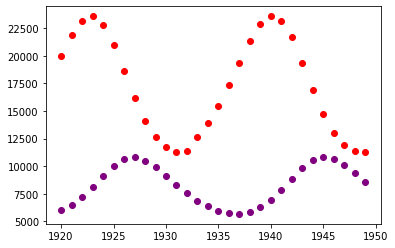

In [0]:
plt.scatter(Anios,Lobos, color='purple')
plt.scatter(Anios, Alces, color='r')
plt.rcParams['figure.figsize'] = (20, 7)

para poder aplicar el modelo deedador-presa a los datos de la tabla es necesario conocer los valores iniciales:
- Alces X(0)= 20000
- Lobos Y(0)= 6000

Elegimos los datos comprendidos entre dos valores maximos y hacemos su media, estimar Ẋ(t) y Ȳ(t).
En el caso de los Lobos consideramos la poblacion comprendida entre 1927 y 1945, en el caso de los Alce 1923 y 1940.


#Elegimos los datos comprendidos entre dos valores maximos de los Lobos y los Alces para calcular la media de estos

In [0]:
## datos maximos de la tabla de los Lobos Y
list=df['Lobos'].array
maxLobos = list[7:25]
print (maxLobos)

<PandasArray>
[10821, 10503,  9918,  9134,  8311,  7543,  6877,  6376,  5965,  5732,  5684,
  5897,  6310,  6976,  7831,  8851,  9830, 10556]
Length: 18, dtype: int64


In [0]:
## Media de los datos max de los Lobos Y
contador = 0
for i in range(18):
  contador =contador + maxLobos[i]
  mediaLobos = contador/18
  print(mediaLobos)

601.1666666666666
1184.6666666666667
1735.6666666666667
2243.1111111111113
2704.8333333333335
3123.8888888888887
3505.9444444444443
3860.1666666666665
4191.555555555556
4510.0
4825.777777777777
5153.388888888889
5503.944444444444
5891.5
6326.555555555556
6818.277777777777
7364.388888888889
7950.833333333333


Por lo tanto la media de los valores de los Lobos:  $$ Y(t) = \frac {\alpha} {\beta} = 7950.83 $$

$\alpha$ = 7950.833333333333$\beta$

In [0]:
## datos maximos de la tabla de los Alces X
list=df['Alces'].array
maxAlces = list[3:20]
print (maxAlces)

<PandasArray>
[23572, 22801, 20987, 18588, 16166, 14122, 12630, 11702, 11289, 11334, 12652,
 13884, 15464, 17330, 19353, 21303, 22841]
Length: 17, dtype: int64


In [0]:
## Media de los datos max de los Alces X
contador = 0
for i in range(17):
  contador =contador + maxAlces[i]
  mediaAlces = contador/17
  print(mediaAlces)

1386.5882352941176
2727.823529411765
3962.3529411764707
5055.764705882353
6006.705882352941
6837.411764705882
7580.35294117647
8268.70588235294
8932.764705882353
9599.470588235294
10343.70588235294
11160.411764705883
12070.058823529413
13089.470588235294
14227.882352941177
15481.0
16824.58823529412


Por lo tanto la **media** de los valores de los Alces: $$ X(t) = \frac {\gamma} {\delta} = 16824.59 $$

$\gamma$ = 16824.58823529412$\delta$ 

In [0]:
##logaritmo natural para evaluar la tasa de crecimmiento de los Alces
import math 
math.log (19353/17330)


0.11040834249069967

Todavia necesitamos otras dos ecuaciones para para poder estimar todos los coeficientes. Para ello razonamos: Cuando la poblacion de depredadores sea muy baja, es de esperar que las presas esten creciendo de manera exponencial. A partir de esta hipoteisis calcularemos **$\alpha$**1. En la tabla observamos que una poblacion baja de Lobos y al mismo tiempo un crecimeinto rapido de los Alces, corresponde al año 1936. para ests años los datos sin X(t)= 17330 y X(t+1)= 19353 en 1937. si sutistuimos en la formula del crecimiento exponencial  

$$ X(t)= X(0)e^{\alpha*t}, $$ se obtiene

$$ 19353= 17330e^{\alpha}  // 
 \alpha = ln (\frac {19353}{17330})= 0.11040834249069967  $$
##  **$\alpha$:** = 11 % la tasa de crecimiento de los Alces el del 11%

In [0]:
## despejamos la ecuacion para encontrar a Beta
(0.11040834249069967/7950.833333333333)

1.3886386226688985e-05

* $\alpha$ = 7950.833333333333$\beta$
* $\beta$ = $\alpha$/ 7950.833333333333
* $\beta$ = 0.11040834249069967 / 7950.833333333333


* $\beta$ = 1.3886386226688985e-05

In [0]:
##logaritmo natural para evaluar la tasa de decrecimiento de los Lobos
math.log (7543/8311)

-0.0969599576993955

En el otro caso, una pblacion muy baja de Alces que implica un ritmo elevado en el descenso de la poblacion de Lobos, se da en el anio 1931. Sean y(0) = 8311,  y(1)=7543, se obtiene:

* $$ y(0) = e^{-\gamma*t} $$

$$8574 = 9387 e^{-\gamma}  $$

* $$ \gamma = \ln (\frac {7543}{8311}) = -0.0969599576993955$$
#  $\gamma$ = 9.1% tasa decrecimiento de los depredadores.

In [0]:
## despejamos la ecuacion para encontrar a Delta δ
(0.0969599576993955/16824.58823529412)

5.762991423231137e-06

* $\gamma$ = 16824.58823529412$\delta$ 
* δ = $\gamma$ / 16824.58823529412
* $\delta$ = 0.0969599576993955 / 16824.58823529412


* $\delta$ = 5.762991423231137e-06

De las expresiones anteriores obtenemos que: 
* X(0)= 20000 ALces
* Y(0)= 6000 Lobos
* $\alpha$ = 0.11040834249069967
* $\beta$ = 1.3886386226688985e-05

* $\gamma$ = 0.0969599576993955
* $\delta$ = 5.762991423231137e-06

* X(t) = $\alpha$ - $\beta$      >>> 0.11040834249069967 - 1.3886386226688985e-05
* Y(t) = - $\gamma$ + $\delta$   >>> -0.0969599576993955 + 5.762991423231137e-06

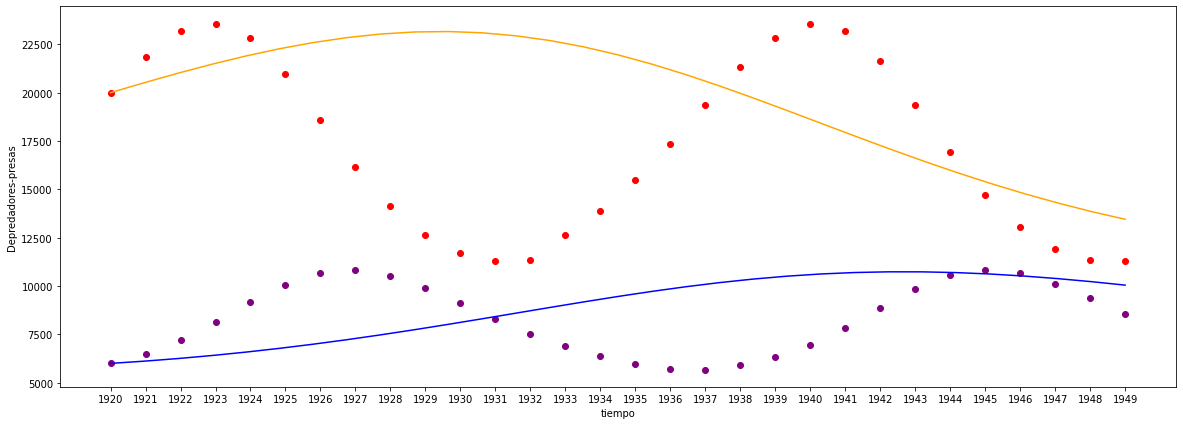

In [0]:
def model(y,t):
  dydt=(-0.0969599576993955*y[0]+5.762991423231137e-06*y[0]*y[1], 0.11040834249069967*y[1]-1.3886386226688985e-05*y[0]*y[1])
  return dydt

y0=[6000,20000]
t=np.linspace(1920,1949, num=31)
y=odeint(model,y0,t)
plt.ylabel('Depredadores-presas')
plt.xlabel('tiempo')
#print(y[-1])
#print(y[:,1])
#print(y[-1]/(300+t[-1]))
plt.scatter(Anios,Lobos, color='purple')
plt.scatter(Anios, Alces, color='r')
plt.plot(t,y[:,0], color='b')
plt.plot(t,y[:,1], color='orange')
plt.rcParams['figure.figsize'] = (35, 15)
plt.xticks(df['Anios'])
plt.show()
#plt.legend();

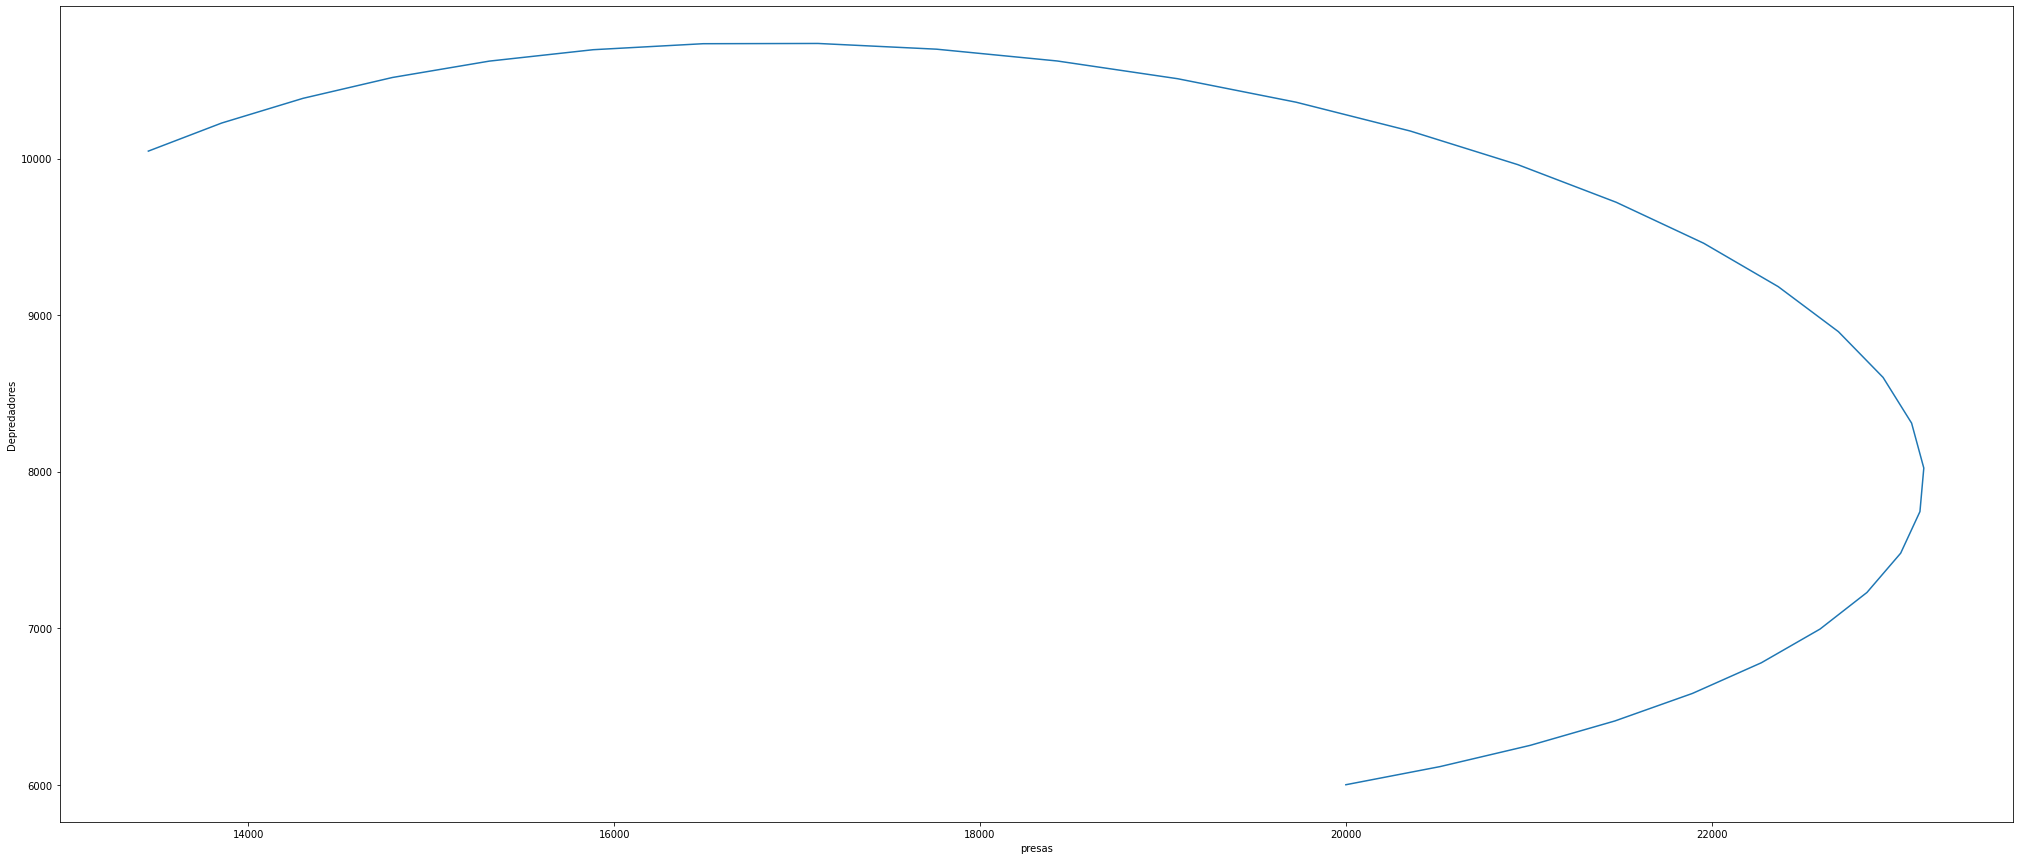

In [0]:
plt.plot(y[:,1],y[:,0])
plt.ylabel('Depredadores')
plt.xlabel('presas')
plt.rcParams['figure.figsize'] = (10, 7)

##Se puede observar que este modelo tiene algunas deficiencias, debido a que los datos fueron inventados y no se acercan a una realidad completamente ciclica. Debido a esto se intento aplicar el metodo de minimos a la tabla, pero el modelo no se ajusto a los datos, por esta razon nos quedamos con el método de máximos, aun asi las curvas del modelo son muy olgadas a lo largo tiempo. Podemos inferir que los lobos consumen otras presas y no alcanza a afectar significativamente a la poblacion de Alces.

##En la gráfica de Depredador Contra Presa se puede observar que el modelo no es ciclico se corta.




---



---




##Verificamos los datos con el método minimos a las dos poblaciones para calcular el promedio.



In [0]:
## datos minimos de la tabla de los Lobos
list=df['Lobos'].array
minLobos = list[16:18]
print (minLobos)

<PandasArray>
[5732, 5684]
Length: 2, dtype: int64


In [0]:
## Media de los datos min de los Lobos
contador = 0
for i in range(2):
  contador =contador + minLobos[i]
  mediaLobos = contador/2
  print(mediaLobos)

2866.0
5708.0


Por lo tanto la **media** de los valores de los Lobos: $$ Y(t) = \frac {\alpha} {\beta} = 5708.0 $$

$\alpha$ = 5708.0 $\beta$ 

In [0]:
## datos min de la tabla de los Alces
list=df['Alces'].array
minAlces = list[11:29]
print (minAlces)

<PandasArray>
[11289, 11334, 12652, 13884, 15464, 17330, 19353, 21303, 22841, 23567, 23174,
 21657, 19383, 16914, 14721, 13046, 11941, 11370]
Length: 18, dtype: int64


In [0]:
## Media de los datos max de los Alces
contador = 0
for i in range(18):
  contador =contador + minAlces[i]
  mediaAlces = contador/18
  print(mediaAlces)

627.1666666666666
1256.8333333333333
1959.7222222222222
2731.0555555555557
3590.1666666666665
4552.944444444444
5628.111111111111
6811.611111111111
8080.555555555556
9389.833333333334
10677.277777777777
11880.444444444445
12957.277777777777
13896.944444444445
14714.777777777777
15439.555555555555
16102.944444444445
16734.61111111111


Por lo tanto la media de los valores de los Alces:  $$ X(t) = \frac {\gamma} {\delta} = 16734.61111111111 $$

$\gamma$ = 16734.61111111111$\delta$

In [0]:
##logaritmo natural para evaluar la tasa de crecimmiento de los Alces
import math 
math.log (19353/17330)

0.11040834249069967

Todavia necesitamos otras dos ecuaciones para para poder estimar todos los coeficientes. Para ello razonamos: Cuando la poblacion de depredadores sea muy baja, es de esperar que las presas esten creciendo de manera exponencial. A partir de esta hipoteisis calcularemos **$\alpha$**1. En la tabla observamos que una poblacion baja de Lobos y al mismo tiempo un crecimeinto rapido de los Alces, corresponde al año 1936. para ests años los datos sin X(t)= 17330 y X(t+1)= 19353 en 1937. si sutistuimos en la formula del crecimiento exponencial  

$$ X(t)= X(0)e^{\alpha*t}, $$ se obtiene

$$ 19353= 17330e^{\alpha}
 = ln (\frac {19353}{17330})= 0.11040834249069967  $$
* **$\alpha$:** = 11 % la tasa decrecimiento de los Alces el del 11%

In [0]:
## despejamos la ecuacion para encontrar a Beta
(0.11040834249069967/5708.0)

1.9342736946513608e-05

* $\alpha$ = 5708.0 $\beta$ 
* $\beta$ = $\alpha$/ 5708.0
* $\beta$ = 0.11040834249069967 / 5708.0


* $\beta$ = 1.9342736946513608e-05

In [0]:
##logaritmo natural para evaluar la tasa de decrecimiento de los Lobos
math.log (7543/8311)

-0.0969599576993955

En el otro caso, una pblacion muy baja de Alces que implica un ritmo elevado en el descenso de la poblacion de Lobos, se da en el anio 1931. Sean y(0) = 8311,  y(1)=7543, se obtiene:

* $$ y(0) = e^{-\gamma*t} $$

$$8574 = 9387 e^{-\gamma}  $$

* $$ \gamma = \ln (\frac {7543}{8311}) = -0.0969599576993955$$
* $\gamma$ = -9.1% tasa decrecimeinto de los depredadores.

In [0]:
## despejamos la ecuacion para encontrar a Delta δ
(0.0969599576993955/16824.58823529412)

5.762991423231137e-06

* $\gamma$ = 16734.61111111111$\delta$
* δ = $\gamma$ / 16734.61111111111
* $\delta$ = 0.0969599576993955 / 16734.61111111111


* $\delta$ = 5.762991423231137e-06

De las expresiones anteriores obtenemos que: 
* X(0)= 20000 Alces
* Y(0)= 6000 Lobos
* $\alpha$ = 0.11040834249069967
* $\beta$ = 1.9342736946513608e-05
* $\gamma$ = -0.0969599576993955
* $\delta$ = 5.762991423231137e-06

beta =6538049.367000001
delta= 125773.0325
* X(t) = $\alpha$ - $\beta$    ____ 0.11040834249069967 - 1.9342736946513608e-05
* Y(t) = - $\gamma$ + $\delta$ ____ -0.0969599576993955 + 5.762991423231137e-06

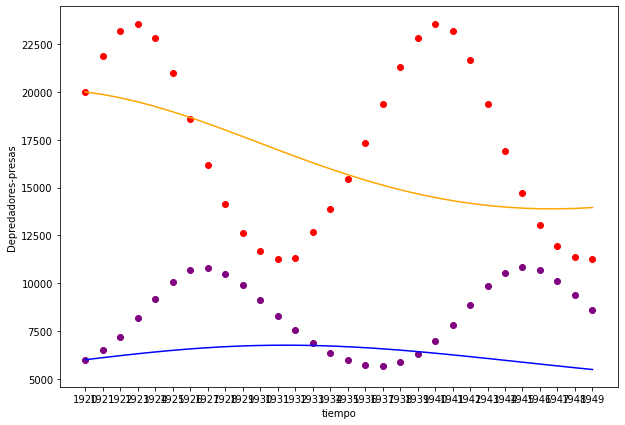

In [0]:
def model(y,t):
  dydt=(-0.0969599576993955*y[0]+5.762991423231137e-06*y[0]*y[1], 0.11040834249069967*y[1]-1.9342736946513608e-05*y[0]*y[1])
  return dydt

y0=[6000,20000]
t=np.linspace(1920,1949, num=31)
y=odeint(model,y0,t)
plt.ylabel('Depredadores-presas')
plt.xlabel('tiempo')
plt.scatter(Anios,Lobos, color='purple')
plt.scatter(Anios, Alces, color='r')
plt.plot(t,y[:,0], color='b')
plt.plot(t,y[:,1], color='orange')
plt.rcParams['figure.figsize'] = (45, 15)
plt.xticks(df['Anios'])
plt.show()
#plt.legend();

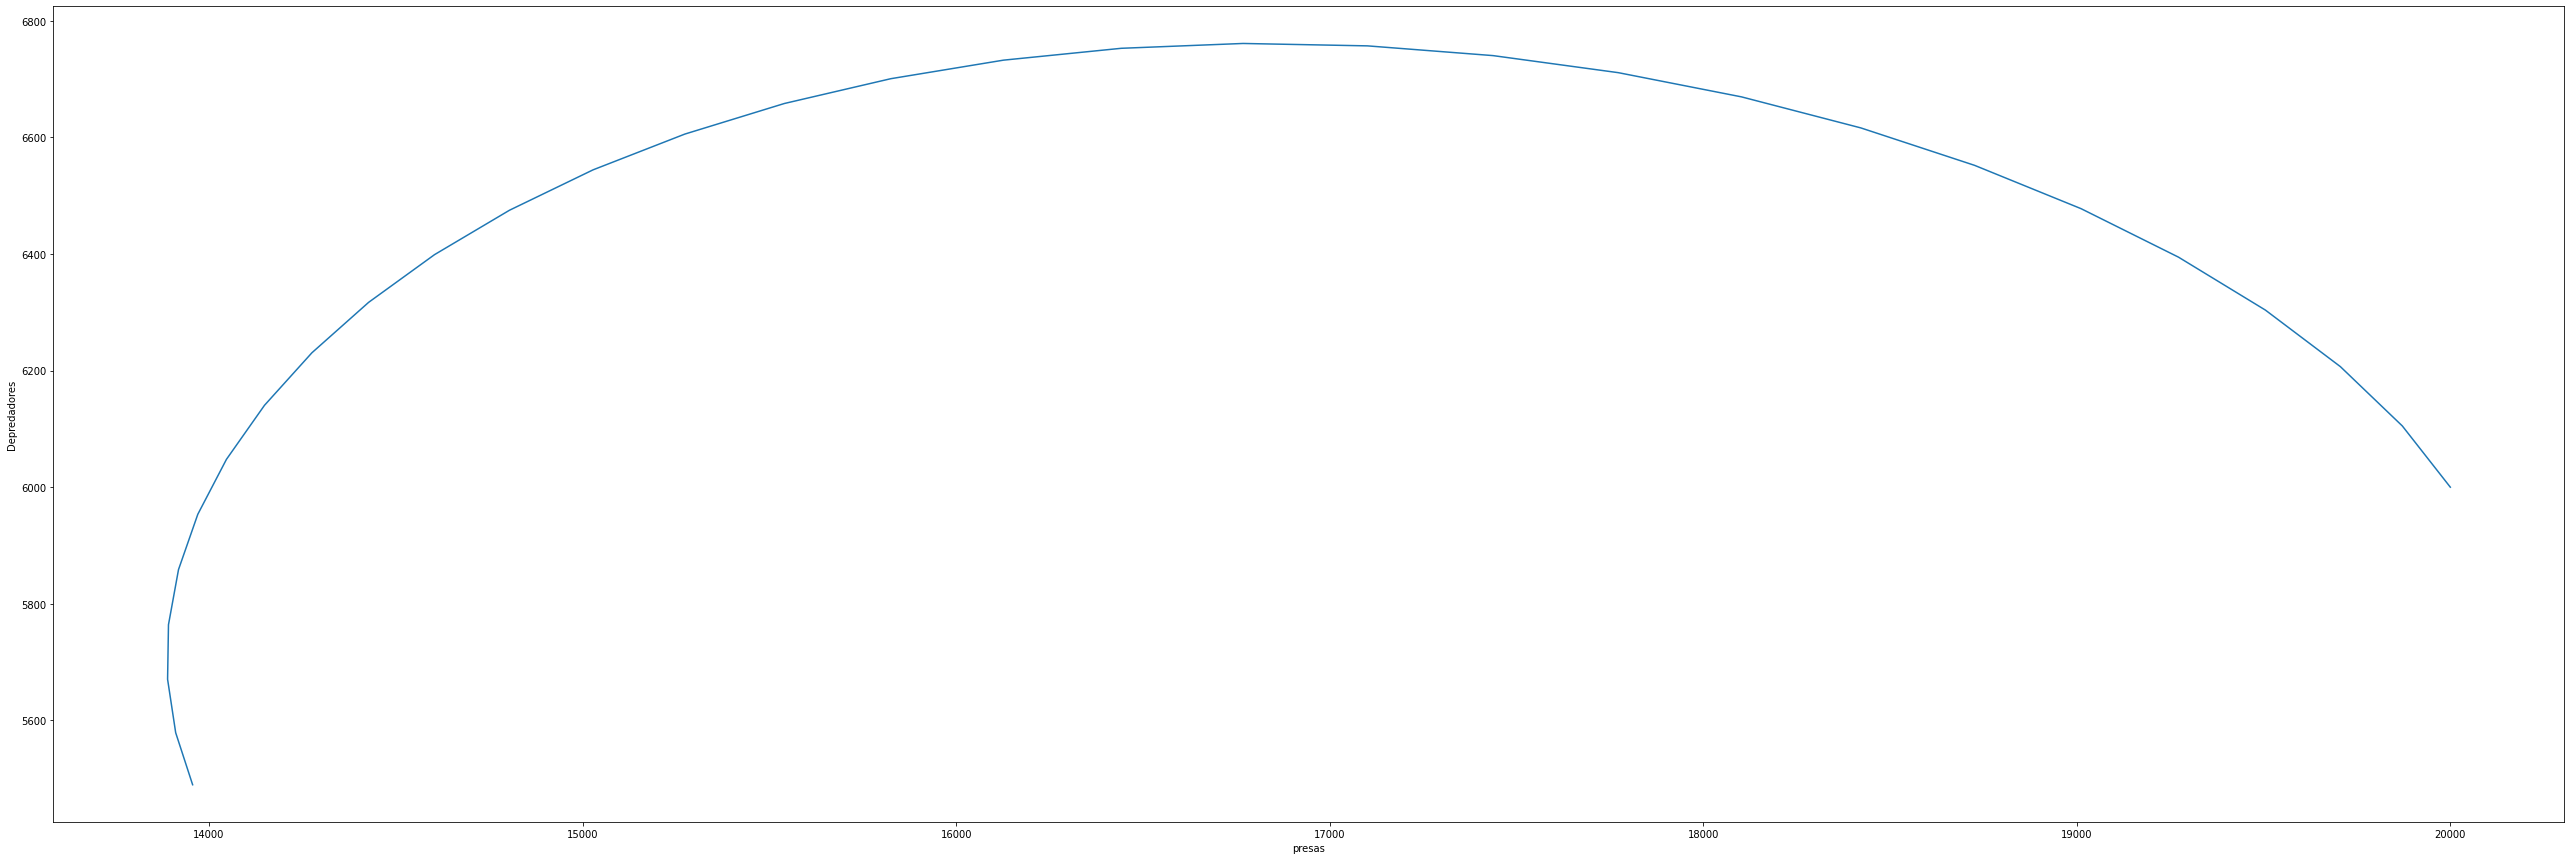

In [0]:
plt.plot(y[:,1],y[:,0])
plt.ylabel('Depredadores')
plt.xlabel('presas')
plt.rcParams['figure.figsize'] = (10, 7)